author: okryzhan vprypesh

In [392]:
import numpy as np
import matplotlib.pyplot as mp

In [393]:
np.random.rand(5, 5)

array([[0.61640526, 0.21242063, 0.118339  , 0.4565786 , 0.9562132 ],
       [0.11941318, 0.77472723, 0.3215    , 0.8722269 , 0.94886106],
       [0.58934933, 0.84207638, 0.04070679, 0.60195778, 0.73053201],
       [0.8831135 , 0.18160202, 0.02408472, 0.88265015, 0.36496934],
       [0.64795563, 0.18893514, 0.96895784, 0.3753998 , 0.98310493]])

In [623]:
a = np.arange(12)
a.reshape(4, 3)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [628]:
def incr_arr(n):
        return np.linspace(0, 1, n).reshape(1, n)
incr_arr(5).shape

(1, 5)

In [639]:
z = np.random.rand(10, 12)
z1 = z[:4, 8:]

(290, 290)


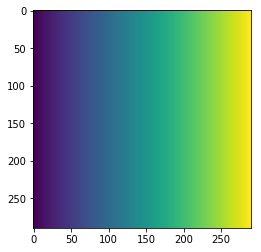

In [640]:
n, m = 290, 290
res = incr_arr(n)
for i in range(1, m):
    res = np.concatenate((res, incr_arr(n)), axis=0)
print(res.shape)
mp.imshow(res)

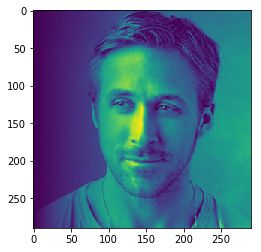

In [653]:
def rand_arr(n):
    return np.random.rand(n).reshape(1, n)
matrix = mp.imread('gosling.png')
mult = res[:,:] * matrix[:,:, 0]
mult = res[:,:] * matrix[:,:, 1]
mult = res[:,:] * matrix[:,:, 2]
mp.imshow(mult)

Part II

In [399]:
def distance(x1, x2, y1, y2):
    xx = (x2 - x1) ** 2
    yy = (y2 - y1) ** 2
    return (np.sqrt(xx + yy))

In [400]:
def Vignette(img, rad_div, hardness):
    height, width = img.shape[:2]
    center = (width / 2, height / 2)
    rad = center[0] if center[0] < center[1] else center[1]
    rad /= rad_div
    for row in range(height):
        for col in range(width):
            r, g, b = img[row, col, :3] * 255
            dist = distance(center[0], col, center[1], row)
            if (dist > rad):
                dif = (dist - rad) * hardness
                r -= dif
                g -= dif
                b -= dif
                img[row, col, 0] = r / 255
                img[row, col, 1] = g / 255
                img[row, col, 2] = b / 255
    return np.clip(img, 0, 1)

In [401]:
def halk(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            tmp = img[row, col, 0]
            img[row, col, 0] = img[row, col, 1]
            img[row, col, 1] = tmp
    return img

def smurf(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            tmp = img[row, col, 0]
            img[row, col, 0] = img[row, col, 2]
            img[row, col, 2] = tmp
    return img

In [402]:
def Hudson(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            img[row, col, 0] *= 1.1
            img[row, col, 1] *= 1.1
            img[row, col, 2] *= 1.25
    img = img + 0.03
    img = Vignette(img, 1.2, 0.6)
    return np.clip(img, 0, 1)

In [403]:
def Lo_fi(img, hardness):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
                img[row, col, 0] *= 1.45
                img[row, col, 1] *= 1.3
                img[row, col, 2] *= 1.3
    img = Vignette(img, 3.5, hardness)
    return np.clip(img, 0 ,1)

In [404]:
def Sierra(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            img[row, col, 0] *= 1.1
    img = (img / 2 + 0.1) * 1.6
    Vignette(img, 1.2, 1)
    return np.clip(img, 0, 1)

In [682]:
def Valencia(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            img[row, col, 0] *= 1.2
            img[row, col, 1] *= 1.1
    img = img * 0.95
    Vignette(img, 0.8, 0.5)
    return np.clip(img, 0, 1)

In [697]:
def Sutro(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            img[row, col, 0] *= 1.35
            img[row, col, 1] *= 1.2
            img[row, col, 2] *= 1.30
    img = img * 0.7
    Vignette(img, 3, 0.3)
    return np.clip(img, 0, 1)

In [407]:
def f_1977(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            img[row, col, 0] *= 1.5
            img[row, col, 2] *= 1.1
    return np.clip((img / 2.1 + 0.07) * 2 - 0.08, 0, 1)

In [408]:
def Kelvin(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            img[row, col, 0] *= 1.9
            img[row, col, 1] *= 1.2
            img[row, col, 2] *= 0.5
    return np.clip((img / 2 + 0.08) * 1.7, 0, 1)

In [530]:
def Rise(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            img[row, col, 0] *= 1.35
            img[row, col, 1] *= 1.05
            img[row, col, 2] *= 0.9
    return Vignette(np.clip((img + 0.1) * 1.0005 + 0.075, 0, 1), 1.3, 0.8)

In [686]:
def Amaro(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            if img[row, col, 0] < 0.3 and img[row, col, 1] < 0.3 and img[row, col, 2] < 0.3:
                img[row, col, 0] *= 1.33
                img[row, col, 1] *= 1.17
                img[row, col, 2] *= 1.53
            else:
                img[row, col, 0] *= 1.18
                img[row, col, 1] *= 1.18
                img[row, col, 2] *= 1.22
    return Vignette(np.clip((img), 0, 1), 1.15, 0.5)

In [678]:
def Earlybird(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            if img[row, col, 0] > (img[row, col, 1] * 1.1) and img[row, col, 0] > (img[row, col, 2] * 1.1):
                main_color = np.array([1.1, 1.1, 1])
            elif img[row, col, 1] > (img[row, col, 0] * 1.1) and img[row, col, 1] > (img[row, col, 2] * 1.1):
                main_color = np.array([1.1, 1.1, 1])
            elif img[row, col, 2] > (img[row, col, 0] * 1.1) and img[row, col, 2] > (img[row, col, 1] * 1.1):
                main_color = np.array([1.1, 1.1, 1])
            else:
                main_color = np.array([1.5, 1.2, 1.05])
            img[row, col] *= main_color * 1.1
    return Vignette(np.clip((img), 0, 1), 1.25, 1)

In [704]:
gosl = mp.imread('gosling.png')

image = gosl
# mp.imshow(Hudson(np.copy(image)))
# mp.imshow(Valencia(np.copy(image)))
# mp.imshow(Lo_fi(np.copy(image), 0.7))
# mp.imshow(Sierra(np.copy(image)))
# mp.imshow(Earlybird(np.copy(image)))
# mp.imshow(Amaro(np.copy(image)))
# mp.imshow(Sutro(np.copy(image)))
# mp.imshow(Rise(np.copy(image)))
# mp.imshow(f_1977(np.copy(image)))
# mp.imshow(Kelvin(np.copy(image)))
# mp.imshow(halk(np.copy(image)))
# mp.imshow(smurf(np.copy(image)))